<a href="https://colab.research.google.com/github/aayushbhurtel/Data_Visualization/blob/main/Recreating_masters_proposal_INITIAL_DRAFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recreating Masters Proposal

## Data Visualization

## Aayush Bhurtel

Currently, I don't have a link for this visualization as it is just a picture of a visualization I am trying to recreate.

I am going to try and recreate the visualization that describes the top 10 highested paid athelete of All-Time. Visualization is presented below.

![recreatingMasters](https://www.sportico.com/wp-content/uploads/2021/12/Screenshot-2021-11-03-193044.png)

I don't have an exact dataset right now but I'm still looking at kaggle and other sources.

This visualization uses pictures in the graph plots which makes it interesting to see who is the athelete and what sports they play. 

Hardship in this visualization is to include picture of athelete themseleves and their sports in the bar chart.

*********************************************************************************************************************************************************************************************************************************************

Now I'm starting to recreate above visualization. I found the dataset by googling highest paid athelete. I mean not dataset but the data in the news website. I was planning to scrape those data and convert those scraped data into pandas dataframe.

loading libraries

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
raw_data = requests.get('https://www.sportingnews.com/us/nba/news/highest-paid-athletes-of-all-time-michael-jordan-leads-star-studded-top-25-list/111wewzd2j0gq1a5hddn1cqgkx')
contents = raw_data.text
soup = BeautifulSoup(contents,"lxml")

In [ ]:
tables = soup.find_all('table',class_="table")
tables[0].find_all('a')
df = pd.read_html(str(tables))[0]

In [ ]:
df.columns = df.iloc[0] 
df = df[1:]
df.head()

In [ ]:
df = df.drop(labels=range(11, 25), axis=0)

In [ ]:
df = df.drop(labels = 25, axis = 0)

In [ ]:
df

,Rank,Athlete,Country,Sport,Turned Pro,Inflation Adjusted Earnings
1,1,Michael Jordan,United States,Basketball,1984,$2.62 billion
2,2,Tiger Woods,United States,Golf,1996,$2.1 billion
3,3,Arnold Palmer,United States,Golf,1954,$1.5 billion
4,4,Jack Nicklaus,United States,Golf,1961,$1.38 billion
5,5,Cristiano Ronaldo,Portugal,Soccer,2002,$1.24 billion
6,6,Floyd Mayweather,United States,Boxing,1996,$1.2 billion
7,7,LeBron James,United States,Basketball,2003,$1.17 billion
8,8,Lionel Messi,Argentina,Soccer,2004,$1.14 billion
9,9,Michael Schumacher,Germany,Racing,1991,$1.13 billion
10,10,Roger Federer,Switzerland,Tennis,1998,$1.12 billion


In [ ]:
# convert earning into numeric datatype from object datatype


df.iloc[0,5]

'$2.62 billion'

In [ ]:
import re

re.sub("[^0123456789\.]","",df.iloc[0,5])

'2.62'

In [ ]:
x = df['Inflation Adjusted Earnings'].apply(lambda s: re.sub("[^0123456789\.]","",s))

In [ ]:
df['Inflation Adjusted Earnings'] = x.astype('float')

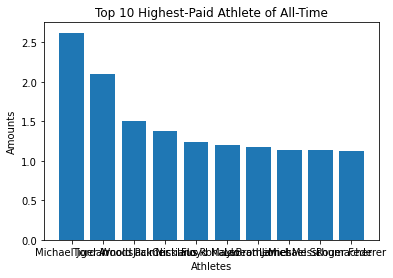

In [ ]:
plt.xlabel('Athletes')
plt.ylabel('Amounts')
plt.title('Top 10 Highest-Paid Athlete of All-Time')
plt.bar(df['Athlete'], df['Inflation Adjusted Earnings']) 
plt.show()